In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
df = pd.read_csv('div_academy_project.csv')

In [4]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [583]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')

# featureler uzre ortalama na analizi

In [584]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


# default sutunundaki yes deyerleri 1 no deyerleri 0 olaraq deyisin

In [585]:
df["default"].value_counts()

default
no     10994
yes      168
Name: count, dtype: int64

In [586]:
df['default'] = df['default'].apply(lambda x: 1 if x == 'yes' else 0) #mapla da olar

In [587]:
df["default"].value_counts()

default
0    10994
1      168
Name: count, dtype: int64

# default rate en cox olan 3 peseni tapin

In [588]:
default_counts = df.groupby('job')['default'].sum()
total_counts = df.groupby('job')['default'].count()

In [589]:
default_rate = (default_counts*100 / total_counts).sort_values(ascending=False)

In [590]:
top_3_jobs = default_rate.head(3)

In [591]:
top_3_jobs

job
entrepreneur    3.048780
housemaid       2.919708
unemployed      2.240896
Name: default, dtype: float64

# categorical sutunlari secen kod yazin

In [592]:
categorical_columns = [col for col in df.columns if df[col].dtype == 'object']# include olar

In [593]:
categorical_columns

['job',
 'marital',
 'education',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome',
 'deposit']

# unknown yazilanlari na ile evez edin

In [594]:
df = df.replace("unknown", pd.NA)

In [595]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,0,2343,yes,no,<NA>,5,may,1042,1,-1,0,<NA>,yes
1,56,admin.,married,secondary,0,45,no,no,<NA>,5,may,1467,1,-1,0,<NA>,yes
2,41,technician,married,secondary,0,1270,yes,no,<NA>,5,may,1389,1,-1,0,<NA>,yes
3,55,services,married,secondary,0,2476,yes,no,<NA>,5,may,579,1,-1,0,<NA>,yes
4,54,admin.,married,tertiary,0,184,no,no,<NA>,5,may,673,2,-1,0,<NA>,yes


# hər bir sutun uzre na valuelerini tapan kod yazin

In [596]:
na_counts = df.isna().sum()

In [597]:
na_counts

age             0
job            70
marital         0
education     497
default         0
balance         0
housing         0
loan            0
contact      2346
day             0
month           0
duration        0
campaign        0
pdays           0
previous        0
poutcome     8326
deposit         0
dtype: int64

# aylar uzre default rateleri vizuallasdirin

In [598]:
default_rate_by_month = df.groupby('month')['default'].mean()*100

In [599]:
default_rate_by_month

month
apr    0.758397
aug    1.382488
dec    0.000000
feb    0.644330
jan    1.744186
jul    3.038309
jun    2.127660
mar    0.000000
may    1.487252
nov    1.484624
oct    0.000000
sep    0.313480
Name: default, dtype: float64

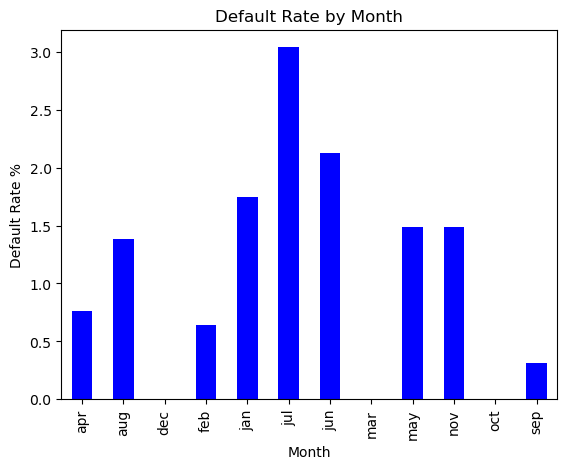

In [600]:
default_rate_by_month.plot(kind='bar', color='blue')
plt.title('Default Rate by Month') 
plt.xlabel('Month')  
plt.ylabel('Default Rate %')  
plt.show()


# NAN valueleri impute edin

In [601]:
na_counts

age             0
job            70
marital         0
education     497
default         0
balance         0
housing         0
loan            0
contact      2346
day             0
month           0
duration        0
campaign        0
pdays           0
previous        0
poutcome     8326
deposit         0
dtype: int64

In [602]:
# Bunlarin hamisi kateqorik deyerlerdir

In [603]:
#job

In [604]:
print(df['job'].value_counts(dropna=False))

job
management       2566
blue-collar      1944
technician       1823
admin.           1334
services          923
retired           778
self-employed     405
student           360
unemployed        357
entrepreneur      328
housemaid         274
<NA>               70
Name: count, dtype: int64


In [605]:
df['job'] = df['job'].fillna(df['job'].mode()[0])

In [606]:
print(df['job'].value_counts(dropna=False))

job
management       2636
blue-collar      1944
technician       1823
admin.           1334
services          923
retired           778
self-employed     405
student           360
unemployed        357
entrepreneur      328
housemaid         274
Name: count, dtype: int64


In [607]:
# education

In [608]:
print(df['education'].value_counts(dropna=False))

education
secondary    5476
tertiary     3689
primary      1500
<NA>          497
Name: count, dtype: int64


In [609]:
df['education'] = df['education'].fillna(df['education'].mode()[0])

In [610]:
print(df['education'].value_counts(dropna=False))

education
secondary    5973
tertiary     3689
primary      1500
Name: count, dtype: int64


In [611]:
#contact

In [612]:
print(df['contact'].value_counts(dropna=False))

contact
cellular     8042
<NA>         2346
telephone     774
Name: count, dtype: int64


In [613]:
df['contact'] = df['contact'].fillna(df['contact'].mode()[0])

In [614]:
print(df['contact'].value_counts(dropna=False))

contact
cellular     10388
telephone      774
Name: count, dtype: int64


In [615]:
# poutcome

In [616]:
print(df['poutcome'].value_counts(dropna=False))

poutcome
<NA>       8326
failure    1228
success    1071
other       537
Name: count, dtype: int64


In [617]:
df['poutcome'] = df['poutcome'].fillna("Unknown")

In [618]:
print(df['poutcome'].value_counts(dropna=False))

poutcome
Unknown    8326
failure    1228
success    1071
other       537
Name: count, dtype: int64


In [619]:
df.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

# binned column yaradi yas sutununa esasen

In [620]:
bins = [0, 30, 45, float('inf')] 
labels = ['Genç', 'Orta Yaşlı', 'Yaşlı'] 
df['age_binned'] = pd.cut(df['age'], bins=bins, labels=labels, right=True)

In [621]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit,age_binned
0,59,admin.,married,secondary,0,2343,yes,no,cellular,5,may,1042,1,-1,0,Unknown,yes,Yaşlı
1,56,admin.,married,secondary,0,45,no,no,cellular,5,may,1467,1,-1,0,Unknown,yes,Yaşlı
2,41,technician,married,secondary,0,1270,yes,no,cellular,5,may,1389,1,-1,0,Unknown,yes,Orta Yaşlı
3,55,services,married,secondary,0,2476,yes,no,cellular,5,may,579,1,-1,0,Unknown,yes,Yaşlı
4,54,admin.,married,tertiary,0,184,no,no,cellular,5,may,673,2,-1,0,Unknown,yes,Yaşlı


# Outlier-lari handle edin

In [622]:
# default lazim deyir kategoriyadir

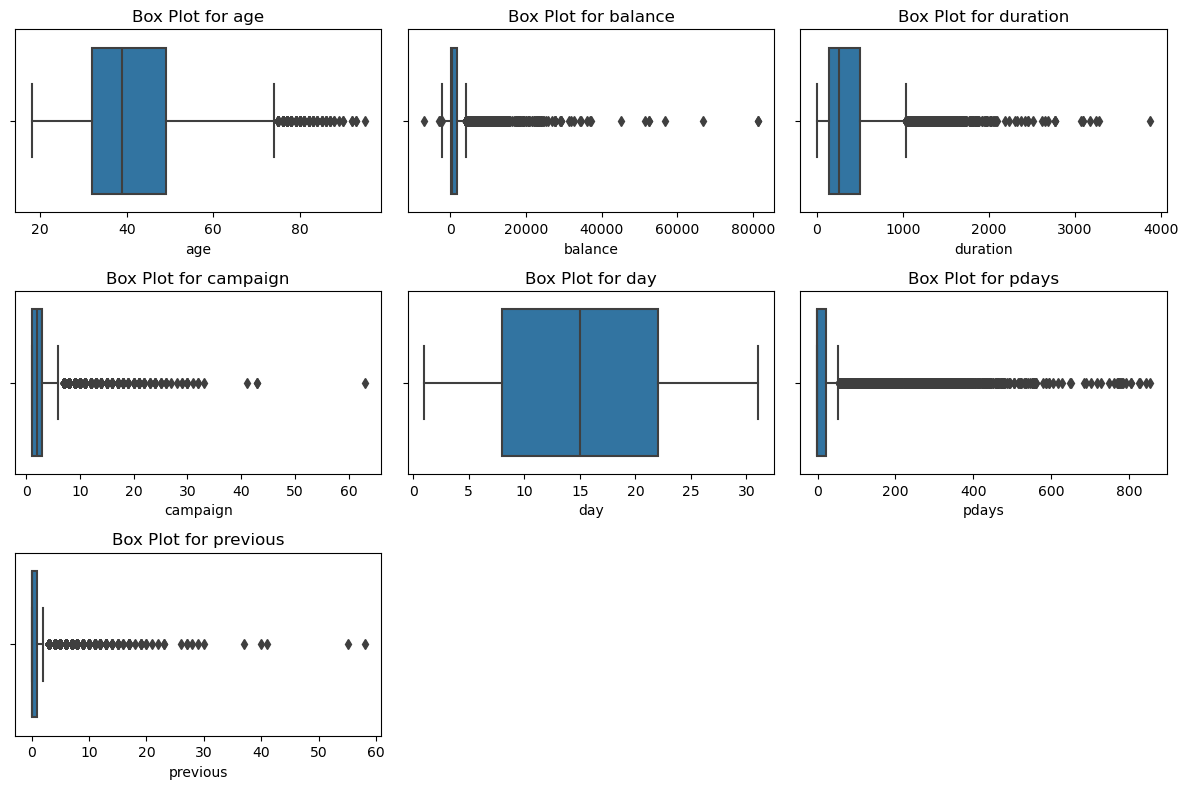

In [568]:
numeric_columns = ['age', 'balance', 'duration', 'campaign','day','pdays','previous']

plt.figure(figsize=(12, 8))

for i, column in enumerate(numeric_columns, 1):
    plt.subplot(3, 3, i)  
    sns.boxplot(x=df[column])
    plt.title(f'Box Plot for {column}')

plt.tight_layout()
plt.show()



In [569]:
# day de ehtiyac yoxdur

In [623]:
numeric_columns = ['age', 'balance', 'duration', 'campaign','pdays','previous']

Q1 = df[numeric_columns].quantile(0.25)
Q3 = df[numeric_columns].quantile(0.75)
IQR = Q3 - Q1
outliers_mask = (df[numeric_columns] < (Q1 - 1.5 * IQR)) | (df[numeric_columns] > (Q3 + 1.5 * IQR))
outliers_summary = pd.DataFrame({
    'Outliers Count': outliers_mask.sum()
})
print(outliers_summary)

          Outliers Count
age                  171
balance             1055
duration             636
campaign             601
pdays               2750
previous            1258


In [625]:
# medianla doldurdum

In [626]:
median_age = df['age'].median()
df['age'] = df['age'].where(~outliers_mask['age'], median_age)

median_balance = df['balance'].median()
df['balance'] = df['balance'].where(~outliers_mask['balance'], median_balance)

median_duration = df['duration'].median()
df['duration'] = df['duration'].where(~outliers_mask['duration'], median_duration)

df['campaign'] = df['campaign'].clip(lower=0, upper=50)

median_pdays = df['pdays'].median()
df['pdays'] = df['pdays'].where(~outliers_mask['pdays'], median_pdays)

median_previous = df['previous'].median()
df['previous'] = df['previous'].where(~outliers_mask['previous'], median_previous)


# default olan və olmayan müştərilər üçün balance sütununun ortalama dəyərlərinin ferqi

In [627]:
mean_balance_default = df[df['default'] == 1]['balance'].mean()  
mean_balance_no_default = df[df['default'] == 0]['balance'].mean() 

In [628]:
difference = mean_balance_default - mean_balance_no_default

In [629]:
difference

-843.7627851122257

# default olmus ve olmamis musterilerin balanslarinin histogrami

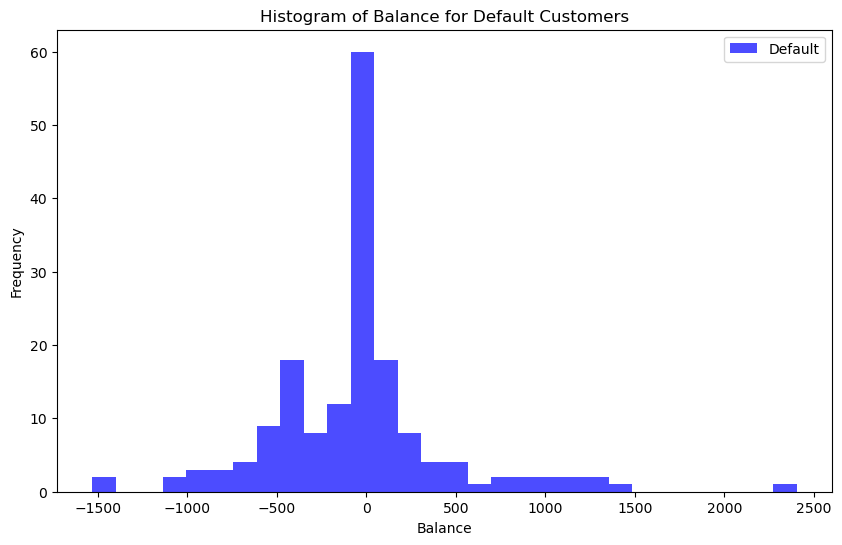

In [630]:
plt.figure(figsize=(10, 6))
plt.hist(df[df['default'] == 1]['balance'], color='blue', bins=30, alpha=0.7, label='Default')
plt.title('Histogram of Balance for Default Customers')
plt.xlabel('Balance')
plt.ylabel('Frequency')
plt.legend()
plt.show()


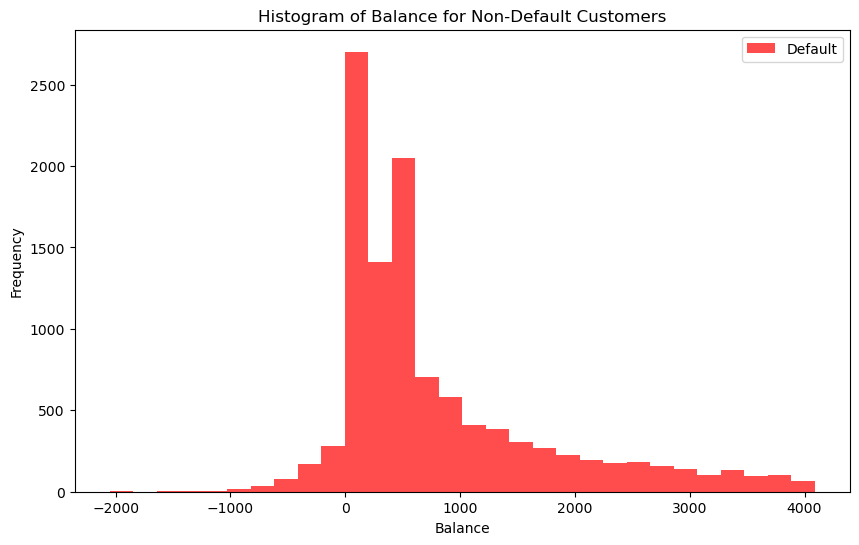

In [631]:
plt.figure(figsize=(10, 6))
plt.hist(df[df['default'] == 0]['balance'], color='red', bins=30, alpha=0.7, label='Default')
plt.title('Histogram of Balance for Non-Default Customers')
plt.xlabel('Balance')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# ortalama balansi en cox olan 5 pese

In [6]:
average_balance_by_job = df.groupby('job')['balance'].mean()
top_5_jobs_by_balance = average_balance_by_job.sort_values(ascending=False).head(5)

In [7]:
top_5_jobs_by_balance 

job
retired          2417.250643
unknown          1945.457143
self-employed    1865.372840
management       1793.663679
entrepreneur     1621.942073
Name: balance, dtype: float64

# ORTLAMA BALANSI EN COX OLAN 5 PESENIN HEM BALANSI HEM DE DEFAULT RATESI GORUNSUN

In [10]:
default_rate_by_job = df.groupby('job')['default'].apply(lambda x: (x == 1).mean()).round(10)
job_stats = pd.DataFrame({
    'average_balance': average_balance_by_job,
    'default_rate': default_rate_by_job*100
})
top_5_jobs_stats = job_stats.sort_values(by='average_balance', ascending=False).head(5)

In [9]:
top_5_jobs_stats

,average_balance,default_rate
job,,
retired,2417.250643,0.0
unknown,1945.457143,0.0
self-employed,1865.372840,0.0
management,1793.663679,0.0
entrepreneur,1621.942073,0.0


# default rate columnun adini deyisib target

In [636]:
df.rename(columns={'default': 'target'}, inplace=True)

In [637]:
df.head()

,age,job,marital,education,target,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit,age_binned
0,59,admin.,married,secondary,0,2343,yes,no,cellular,5,may,255,1,-1,0,Unknown,yes,Yaşlı
1,56,admin.,married,secondary,0,45,no,no,cellular,5,may,255,1,-1,0,Unknown,yes,Yaşlı
2,41,technician,married,secondary,0,1270,yes,no,cellular,5,may,255,1,-1,0,Unknown,yes,Orta Yaşlı
3,55,services,married,secondary,0,2476,yes,no,cellular,5,may,579,1,-1,0,Unknown,yes,Yaşlı
4,54,admin.,married,tertiary,0,184,no,no,cellular,5,may,673,2,-1,0,Unknown,yes,Yaşlı


# duration guneli aya cevirin

In [638]:
df["duration"]

0        255
1        255
2        255
3        579
4        673
        ... 
11157    257
11158     83
11159    156
11160      9
11161    628
Name: duration, Length: 11162, dtype: int64

In [639]:
df['duration'] = df['duration'] / 30
df['duration'] = df['duration'].round(1).astype(float)


In [640]:
df["duration"]

0         8.5
1         8.5
2         8.5
3        19.3
4        22.4
         ... 
11157     8.6
11158     2.8
11159     5.2
11160     0.3
11161    20.9
Name: duration, Length: 11162, dtype: float64

# educationla depositin elaqesi varmi? correlation

In [641]:
df["education"].unique()

array(['secondary', 'tertiary', 'primary'], dtype=object)

In [ ]:
# elAQE VAR

In [642]:
df['education_encoded'] = df['education'].map({'secondary': 0, 'tertiary': 1, 'primary': 2})
df['deposit_encoded'] = df['deposit'].map({'no': 0, 'yes': 1})
correlation = df[['education_encoded', 'deposit_encoded']].corr()
print(correlation)


                   education_encoded  deposit_encoded
education_encoded           1.000000         0.002134
deposit_encoded             0.002134         1.000000


In [643]:
# no relationship

# jop and education together

In [644]:
df['job_education'] = df['job'] + "_" + df['education']

In [645]:
df['job_education']

0            admin._secondary
1            admin._secondary
2        technician_secondary
3          services_secondary
4             admin._tertiary
                 ...         
11157     blue-collar_primary
11158      services_secondary
11159    technician_secondary
11160    technician_secondary
11161    technician_secondary
Name: job_education, Length: 11162, dtype: object